<a href="https://colab.research.google.com/github/amit-raj-repo/ML-Logistic-Regression-Python/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# Importing the dataset

df = pd.read_csv("/content/gdrive/My Drive/Data/data.csv").dropna(axis = 0)
df.head()

In [0]:
#Seprating dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [6]:
print(X.shape)

(169559, 25)


In [0]:
#Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=3)

In [0]:
#===============================================================#
# Logistic Regression Model
#===============================================================#

In [0]:
model = LogisticRegression(penalty='l2', random_state=3, max_iter= 500,
                            warm_start=True)

In [67]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [68]:
#Getting all the model coefficients
model.coef_

array([[-2.76704230e-02,  2.26789014e-03,  2.60337475e-02,
        -6.78084339e-02,  2.63834735e-02,  2.58283722e-02,
        -1.26264989e-02, -4.90159060e-02, -1.91578841e-01,
        -8.49623751e-02, -4.10931524e-01,  2.96591603e-01,
        -1.31284177e-01, -3.89736711e-01,  2.47506821e-02,
        -2.14167556e-01, -4.46304666e-02,  3.76507113e-02,
        -9.07717583e-02,  1.00535133e-02,  4.49173364e-02,
        -8.73036619e-03,  8.20668150e+00, -5.55617800e+00,
         1.56363965e-02]])

In [0]:
#Getting the predictions
pred = model.predict(X_test)
predProb = model.predict_proba(X_test)

In [70]:
#Checking the accuracy
print(metrics.accuracy_score(y_test, pred))

0.8100967209247464


In [71]:
#Checking the confusion metrics
print(confusion_matrix(y_test, pred))

[[25416   494]
 [ 5946  2056]]


In [0]:
# Getting values for FPR and TPR we take the probability of 1 here thats why predProb[:,1] 
fpr, tpr, threshold = metrics.roc_curve(y_test, predProb[:,1])
roc_auc = metrics.auc(fpr, tpr)

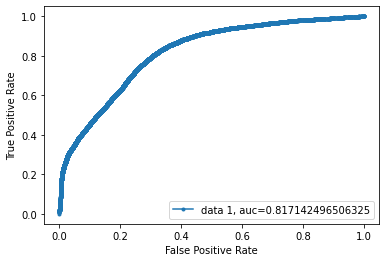

In [73]:
# ROC Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc), marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()